In [1]:
#slopes plot for 3D plots: extract 3D volume slopes from npz, convert 2D column slopes to 3D
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
import pandas as pd
plt.rcParams["font.family"] = "serif"

In [2]:
#get the slopes from the volume density file from Sabrina
inputfile = ('slopes_3D.npz')
plot_data = np.load(inputfile, allow_pickle=True)
slopes = plot_data['ave_slopes']
grav_3D_vol = -1*slopes[0:6]
turbulence_3D_vol = -1*slopes[7:13]
mag_3D_vol = -1*slopes[14:20]
outflows_3D_vol = -1*slopes[21:27]
error_3D = plot_data['err_slopes']
grav_err_vol = error_3D[0:6]
turbulence_err_vol = error_3D[7:13]
mag_err_vol = error_3D[14:20]
outflows_err_vol = error_3D[21:27]

In [3]:
#load in 2D slopes to be organized
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')
for a in range(1):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_gt.append((-1)*slope_list[0+a])
        if ii == 1: #remove trouble case
            slope_x_gtm.append(100)
        else:
            slope_x_gtm.append((-1)*slope_list[3+a])
        if ii == 3: #remove trouble case
            slope_x_gtmp.append(100)
        else:
            slope_x_gtmp.append((-1)*slope_list[6+a])      
        #error bars
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_gt.append(slope_list[0+a])
        error_x_gtm.append(slope_list[3+a])
        error_x_gtmp.append(slope_list[6+a])


In [4]:
#2D slopes conversion
slope_1 =abs(slopes)
for d in range(28):
    slope_1[d] = -2/(1-3/abs(slopes[d]))
grav_2D_vol = slope_1[0:6]
turbulence_2D_vol = slope_1[7:13]
mag_2D_vol = slope_1[14:20]
outflows_2D_vol = slope_1[21:27]

In [5]:
'''#plot comparisons of 2D and 3D
plt.figure(figsize = (5,5))
plt.errorbar(slope_x_g,grav_2D_vol,color = 'C3', xerr=error_x_g, fmt = '*')
plt.errorbar(slope_x_gt,turbulence_2D_vol,color = 'C2',xerr=error_x_gt, fmt = '+')
plt.errorbar(slope_x_gtm,mag_2D_vol,color = 'C1',xerr=error_x_gtm, fmt = 's')
plt.errorbar(slope_x_gtmp,outflows_2D_vol,color = 'C0', xerr=error_x_gtmp, fmt = 'o')


#plot bells and whistles
plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows'], loc = 'lower right', fontsize = 15)
#plot x = y line
x=.1*np.linspace(0,90)
y=x
plt.plot(x,y, color = 'black')
#plt.title('2D slopes', size = 15)
plt.xlabel('Column Density Slopes', size=17)
plt.ylabel('Volume Density Slopes (3D -> 2D)', size=17)
plt.ylim(1,8.5)
plt.xlim(1,8.5)
plt.annotate('2D Slopes', (3.5,7.5), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
plt.tick_params(direction='in', which = 'major', size =10, labelsize = 15)
plt.tick_params(direction='in', which = 'minor', size =4)
#plt.legend(['volume slope gravity', 'column converted slope gravity', 'volume slope turbulence', 'column converted slope turbulence','volume slope magnetic', 'column converted slope magnetic', 'volume slope outflows', 'column converted slope outflows'])
plt.tight_layout()
plt.savefig('plots/3D_slope_converted', bbox_inches='tight', format = 'pdf')
'''

"#plot comparisons of 2D and 3D\nplt.figure(figsize = (5,5))\nplt.errorbar(slope_x_g,grav_2D_vol,color = 'C3', xerr=error_x_g, fmt = '*')\nplt.errorbar(slope_x_gt,turbulence_2D_vol,color = 'C2',xerr=error_x_gt, fmt = '+')\nplt.errorbar(slope_x_gtm,mag_2D_vol,color = 'C1',xerr=error_x_gtm, fmt = 's')\nplt.errorbar(slope_x_gtmp,outflows_2D_vol,color = 'C0', xerr=error_x_gtmp, fmt = 'o')\n\n\n#plot bells and whistles\nplt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows'], loc = 'lower right', fontsize = 15)\n#plot x = y line\nx=.1*np.linspace(0,90)\ny=x\nplt.plot(x,y, color = 'black')\n#plt.title('2D slopes', size = 15)\nplt.xlabel('Column Density Slopes', size=17)\nplt.ylabel('Volume Density Slopes (3D -> 2D)', size=17)\nplt.ylim(1,8.5)\nplt.xlim(1,8.5)\nplt.annotate('2D Slopes', (3.5,7.5), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))\nplt.tick_params(direction=

In [6]:
'''#combined fit 3D comparision 3-panel plot
#convert 2D column density slopes to 3D
axis = ['x-axis','y-axis','z-axis']
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
ax =ax.ravel()
def convert(slope):
    return [-i for i in slope]
#load in 2D slopes to be organized
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')
for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append((-1)*slope_list[0+a])
        slope_x_gt.append((-1)*slope_list[3+a])
        slope_x_gtm.append((-1)*slope_list[6+a])
        slope_x_gtmp.append((-1)*slope_list[9+a])
        #error bars
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
    grav_3D_col = np.zeros(6)
    turbulence_3D_col = np.zeros(6)
    mag_3D_col = np.zeros(6)
    outflows_3D_col = np.zeros(6)
    error_3D_g = np.zeros(6)
    error_3D_gt = np.zeros(6)
    error_3D_gtm = np.zeros(6)
    error_3D_gtmp = np.zeros(6)
    x=.1*np.linspace(0,90)
    y=x

    for z in range(6):
        grav_3D_col[z] = 3/(2/slope_x_g[z]+1)
        turbulence_3D_col[z] = 3/(2/slope_x_gt[z]+1)
        mag_3D_col[z] = 3/(2/slope_x_gtm[z]+1)
        outflows_3D_col[z] = 3/(2/slope_x_gtmp[z]+1)
        error_3D_g[z] = (6/(slope_x_g[z]+2)**2)*error_x_g[z]
        error_3D_gt[z] = (6/(slope_x_gt[z]+2)**2)*error_x_gt[z]
        error_3D_gtm[z] = (6/(slope_x_gtm[z]+2)**2)*error_x_gtm[z]
        error_3D_gtmp[z] = (6/(slope_x_gtmp[z]+2)**2)*error_x_gtmp[z]

    #plot comparisons of 2D and 3D
    #ax[a].errorbar(grav_3D_col,grav_3D_vol,color = 'C3',xerr=error_3D_g, yerr = grav_err_vol, fmt = '*', markersize = 9)
    ax[a].errorbar(turbulence_3D_col,turbulence_3D_vol,color = 'C2',xerr=error_3D_gt,yerr = turbulence_err_vol, markersize = 9, fmt = '+')
    ax[a].errorbar(mag_3D_col,mag_3D_vol,color = 'C1',xerr=error_3D_gtm,yerr = mag_err_vol, fmt = 's', markersize = 9)
    ax[a].errorbar(outflows_3D_col,outflows_3D_vol,color = 'C0', xerr=error_3D_gtmp,yerr = outflows_err_vol, fmt = 'o', markersize = 9)

    #plot bells and whistles
    if a == 0:
        ax[0].legend(['Turbulence', 'B field', 'Outflows'], loc = 'lower right',fontsize = 15)
    #plot x = y line
    ax[a].plot(x,y, color = 'black')
    #plt.title('3D slopes', size = 15)
    ax[a].set_xlabel('Column Density Slopes (2D->3D)', size=17)
    ax[0].set_ylabel('Volume Density Slopes ', size=17)
    ax[a].set_ylim(1,2.75)
    ax[a].set_xlim(1.25,2.6)
    ax[a].annotate(axis[a], (2.3,2.6), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
    ax[0].annotate('Combined Fit Slopes', (1.35,2.6), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
    ax[a].set_xticks((1.4,1.6,1.8,2.0,2.2,2.4))
    ax[a].tick_params(direction='in', which = 'major', size =10,labelsize = 14)
    ax[a].tick_params(direction='in', which = 'minor', size =4)
#plt.legend(['volume slope gravity', 'column converted slope gravity', 'volume slope turbulence', 'column converted slope turbulence','volume slope magnetic', 'column converted slope magnetic', 'volume slope outflows', 'column converted slope outflows'])
plt.tight_layout()
plt.savefig('plots/3D_slope_comparison.pdf', bbox_inches='tight', format = 'pdf')
'''

'#combined fit 3D comparision 3-panel plot\n#convert 2D column density slopes to 3D\naxis = [\'x-axis\',\'y-axis\',\'z-axis\']\nfig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex = \'all\', sharey = \'row\', gridspec_kw={\'hspace\': 0,\'wspace\':0})\nax =ax.ravel()\ndef convert(slope):\n    return [-i for i in slope]\n#load in 2D slopes to be organized\ninputfile = (\'txt_file_storage/slope_0%_lim1.txt\',\'txt_file_storage/slope_1%_lim1.txt\',\'txt_file_storage/slope_2%_lim1.txt\',\'txt_file_storage/slope_3%_lim1.txt\',\'txt_file_storage/slope_4%_lim1.txt\',\'txt_file_storage/slope_5%_lim1.txt\')\nfor a in range(3):\n    slope_x_g = []\n    slope_x_gt = []\n    slope_x_gtm = []\n    slope_x_gtmp = []\n    error_x_g = []\n    error_x_gt = []\n    error_x_gtm = []\n    error_x_gtmp = []\n    sfe = range(6)\n    for ii in range(6):\n        #slope cutting. data from txt file chopped into usable form.\n        f =open(inputfile[ii])\n        newlist = [i for i in f]\n        stri

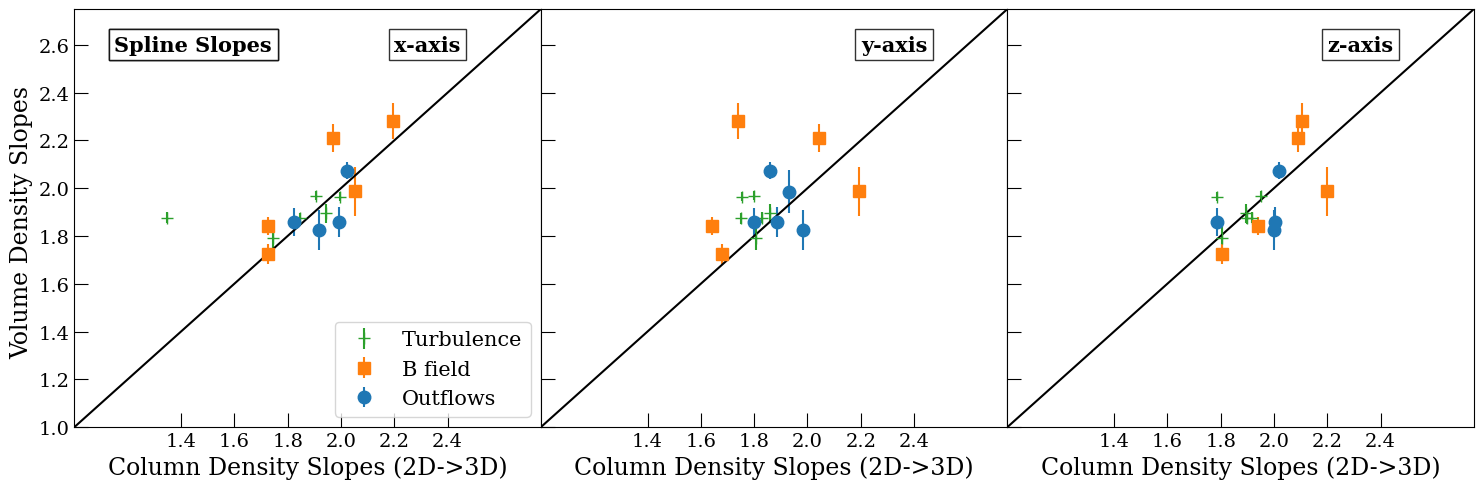

In [7]:
#spline version of 3D plot

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
ax =ax.ravel()
axis = ['x-axis','y-axis','z-axis']
spline_comparison_g = []
spline_comparison_gt = []
spline_comparison_gtm = []
spline_comparison_gtmp = []
spline_2D_slope_full_g = []
spline_2D_slope_full_gt = []
spline_2D_slope_full_gtm = []
spline_2D_slope_full_gtmp = []

#load in 2D slopes to be organized
inputfile = ('txt_file_storage/spline_slope0%.txt','txt_file_storage/spline_slope1%.txt','txt_file_storage/spline_slope2%.txt','txt_file_storage/spline_slope3%.txt','txt_file_storage/spline_slope4%.txt','txt_file_storage/spline_slope5%.txt')
for a in range(3):
    spline_slope_x_g = []
    spline_slope_x_gt = []
    spline_slope_x_gtm = []
    spline_slope_x_gtmp = []

    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        spline_slope_x_gt.append((-1)*slope_list[0+a])
        if ii == 1: #remove trouble case
            spline_slope_x_gtm.append(100)
        else:
            spline_slope_x_gtm.append((-1)*slope_list[3+a])
        if ii == 3: #remove trouble case
            spline_slope_x_gtmp.append(100)
        else:
            spline_slope_x_gtmp.append((-1)*slope_list[6+a]) 
        spline_2D_slope_full_gt.append(spline_slope_x_gt)
        spline_2D_slope_full_gtm.append(spline_slope_x_gtm)
        spline_2D_slope_full_gtmp.append(spline_slope_x_gtmp)
    turbulence_3D_col_spline = np.zeros(6)
    mag_3D_col_spline = np.zeros(6)
    outflows_3D_col_spline = np.zeros(6)
    x=.1*np.linspace(0,90)
    y=x
    
    for z in range(6):
        turbulence_3D_col_spline[z] = 3/(2/spline_slope_x_gt[z]+1)
        mag_3D_col_spline[z] = 3/(2/spline_slope_x_gtm[z]+1)
        outflows_3D_col_spline[z] = 3/(2/spline_slope_x_gtmp[z]+1)
        spline_comparison_gt.append(turbulence_3D_col_spline[z])
        spline_comparison_gtm.append(mag_3D_col_spline[z])
        spline_comparison_gtmp.append(outflows_3D_col_spline[z])
    #plot comparisons of 2D and 3D
    ax[a].errorbar(turbulence_3D_col_spline,turbulence_3D_vol,color = 'C2',yerr = turbulence_err_vol, fmt = '+', markersize = 9)
    ax[a].errorbar(mag_3D_col_spline,mag_3D_vol,color = 'C1',yerr = mag_err_vol, fmt = 's', markersize = 9)
    ax[a].errorbar(outflows_3D_col_spline,outflows_3D_vol,color = 'C0',yerr = outflows_err_vol, fmt = 'o', markersize = 9)
    ax[a].errorbar(mag_3D_col_spline[1],mag_3D_vol[1],color = 'black', fmt = '.', markersize = 9)

    #plot bells and whistles
    if a == 0:
        ax[0].legend([ 'Turbulence', 'B field', 'Outflows'], loc = 'lower right',fontsize = 15)
    #plot x = y line
    ax[a].plot(x,y, color = 'black')
    #plt.title('3D slopes', size = 15)
    ax[a].set_xlabel('Column Density Slopes (2D->3D)', size=17)
    ax[0].set_ylabel('Volume Density Slopes ', size=17)
    ax[a].set_ylim(1,2.75)
    ax[a].set_xlim(1.0,2.75)
    ax[a].annotate(axis[a], (2.2,2.6), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
    ax[0].annotate('Spline Slopes', (1.15,2.6), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
    ax[a].set_xticks((1.4,1.6,1.8,2.0,2.2,2.4))
    ax[a].tick_params(direction='in', which = 'major', size =10,labelsize = 14)
    ax[a].tick_params(direction='in', which = 'minor', size =4)
#plt.legend(['volume slope gravity', 'column converted slope gravity', 'volume slope turbulence', 'column converted slope turbulence','volume slope magnetic', 'column converted slope magnetic', 'volume slope outflows', 'column converted slope outflows'])
plt.tight_layout()
plt.savefig('plots/3D_slope_comparison_spline.pdf', bbox_inches='tight', format = 'pdf')


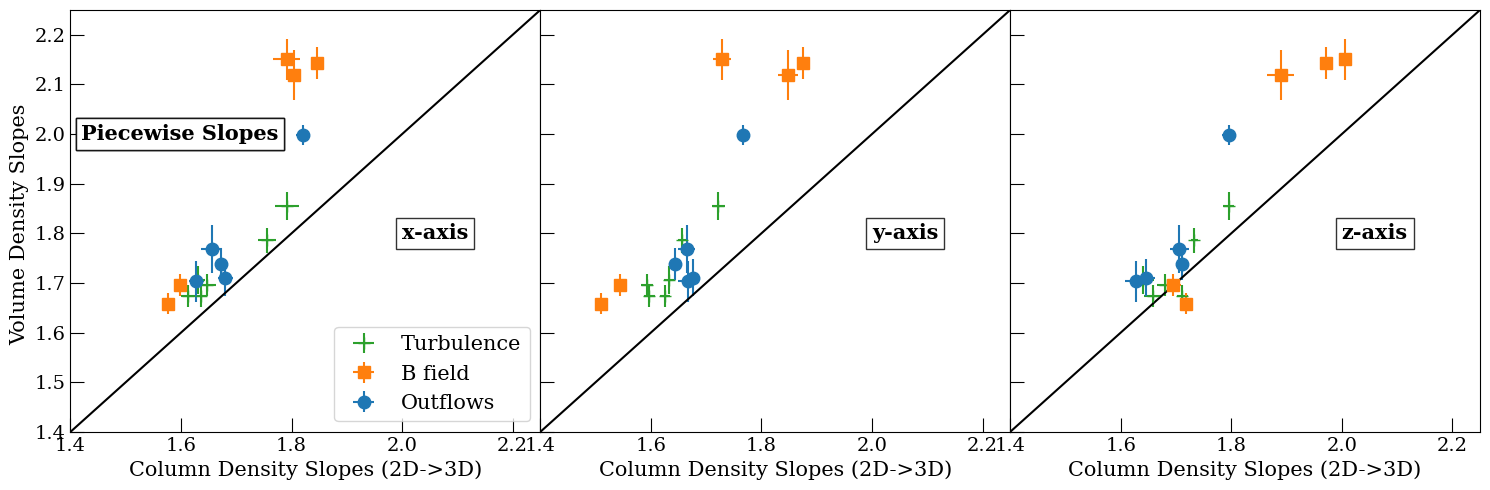

In [9]:
#piecewise 3D comparision
#convert 2D column density slopes to 3D
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
ax =ax.ravel()
axis = ['x-axis','y-axis','z-axis']
piece_comparison_g = []
piece_comparison_gt = []
piece_comparison_gtm = []
piece_comparison_gtmp = []
piece_comparison_err_g = []
piece_comparison_err_gt = []
piece_comparison_err_gtm = []
piece_comparison_err_gtmp = []
piece_2D_slope_full_g = []
piece_2D_slope_full_gt = []
piece_2D_slope_full_gtm = []
piece_2D_slope_full_gtmp = []
piece_2D_slope_full_gt_err = []
piece_2D_slope_full_gtm_err = []
piece_2D_slope_full_gtmp_err = []
def convert(slope):
    return [-i for i in slope]
#load in 2D slopes to be organized
inputfile = ('txt_file_storage/power_fit_slope0%.txt','txt_file_storage/power_fit_slope1%.txt','txt_file_storage/power_fit_slope2%.txt','txt_file_storage/power_fit_slope3%.txt','txt_file_storage/power_fit_slope4%.txt','txt_file_storage/power_fit_slope5%.txt')
for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    pdf_error_x_g = []
    pdf_error_x_gt = []
    pdf_error_x_gtm = []
    pdf_error_x_gtmp = []
    slope_x_gt_err = []
    slope_x_gtm_err = []
    slope_x_gtmp_err = []
    
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_gt.append((1)*slope_list[0+a])
        if ii == 1:
            slope_x_gtm.append(100)
        else:
            slope_x_gtm.append((1)*slope_list[3+a])
        if ii == 3:
            slope_x_gtmp.append(100)
        else:
            slope_x_gtmp.append((1)*slope_list[6+a])
        piece_2D_slope_full_gt.append(slope_x_gt)
        piece_2D_slope_full_gtm.append(slope_x_gtm)
        piece_2D_slope_full_gtmp.append(slope_x_gtmp)
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_gt_err.append((1)*slope_list[0+a])
        slope_x_gtm_err.append((1)*slope_list[3+a])
        slope_x_gtmp_err.append((1)*slope_list[6+a])
        piece_2D_slope_full_gt_err.append(slope_x_gt_err)
        piece_2D_slope_full_gtm_err.append(slope_x_gtm_err)
        piece_2D_slope_full_gtmp_err.append(slope_x_gtmp_err)
        #error bars
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        pdf_error_x_gt.append(slope_list[0+a])
        pdf_error_x_gtm.append(slope_list[3+a])
        pdf_error_x_gtmp.append(slope_list[6+a])
    grav_3D_col_piece = np.zeros(6)
    turbulence_3D_col_piece = np.zeros(6)
    mag_3D_col_piece = np.zeros(6)
    outflows_3D_col_piece = np.zeros(6)
    error_3D_g_piece = np.zeros(6)
    error_3D_gt_piece = np.zeros(6)
    error_3D_gtm_piece = np.zeros(6)
    error_3D_gtmp_piece = np.zeros(6)
    x=.1*np.linspace(0,90)
    y=x

    for z in range(6):
        turbulence_3D_col_piece[z] = 3/(2/slope_x_gt[z]+1)
        mag_3D_col_piece[z] = 3/(2/slope_x_gtm[z]+1)
        outflows_3D_col_piece[z] = 3/(2/slope_x_gtmp[z]+1)
        error_3D_gt_piece[z] = (6/(slope_x_gt[z]+2)**2)*pdf_error_x_gt[z]
        error_3D_gtm_piece[z] = (6/(slope_x_gtm[z]+2)**2)*pdf_error_x_gtm[z]
        error_3D_gtmp_piece[z] = (6/(slope_x_gtmp[z]+2)**2)*pdf_error_x_gtmp[z]
        
        #for comparison
        piece_comparison_gt.append(turbulence_3D_col_piece[z])
        piece_comparison_gtm.append(mag_3D_col_piece[z])
        piece_comparison_gtmp.append(outflows_3D_col_piece[z])
        piece_comparison_err_gt.append(error_3D_gt_piece[z])
        piece_comparison_err_gtm.append(error_3D_gtm_piece[z])
        piece_comparison_err_gtmp.append(error_3D_gtmp_piece[z])
    #load in piecewise volume slopes
    inputfile2= ('txt_file_storage/vol_power_fit_slope0%.txt','txt_file_storage/vol_power_fit_slope1%.txt','txt_file_storage/vol_power_fit_slope2%.txt','txt_file_storage/vol_power_fit_slope3%.txt','txt_file_storage/vol_power_fit_slope4%.txt','txt_file_storage/vol_power_fit_slope5%.txt')
    slope_volPDF_g = []
    slope_volPDF_gt = []
    slope_volPDF_gtm = []
    slope_volPDF_gtmp = []
    err_volPDF_g = []
    err_volPDF_gt = []
    err_volPDF_gtm = []
    err_volPDF_gtmp = []

    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile2[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_volPDF_gt.append((1)*slope_list[0])
        if ii == 1:
            slope_volPDF_gtm.append(100)
        else:
            slope_volPDF_gtm.append((1)*slope_list[1])
        if ii == 3:
            slope_volPDF_gtmp.append(100)
        else:
            slope_volPDF_gtmp.append((1)*slope_list[2])
        #again, but for errorbars
        f =open(inputfile2[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        err_volPDF_gt.append(slope_list[0])
        err_volPDF_gtm.append(slope_list[1])
        err_volPDF_gtmp.append(slope_list[2])
    #plot comparisons of 2D and 3D
    ax[a].errorbar(turbulence_3D_col_piece,slope_volPDF_gt,color = 'C2',xerr=error_3D_gt_piece,yerr = err_volPDF_gt, fmt = '+', markersize = 9)
    ax[a].errorbar(mag_3D_col_piece,slope_volPDF_gtm,color = 'C1',xerr=error_3D_gtm_piece,yerr = err_volPDF_gtm, fmt = 's', markersize = 9)
    ax[a].errorbar(outflows_3D_col_piece,slope_volPDF_gtmp,color = 'C0', xerr=error_3D_gtmp_piece,yerr = err_volPDF_gtmp, fmt = 'o', markersize = 9)
    ax[a].errorbar(mag_3D_col_piece[1],slope_volPDF_gtm[1],color = 'black', fmt = '.', markersize = 9)    
    #plot bells and whistles
    if a == 0:
        ax[0].legend(['Turbulence', 'B field', 'Outflows'], loc = 'lower right',fontsize = 15)
    #plot x = y line
    ax[a].plot(x,y, color = 'black')
    ax[a].set_xlabel('Column Density Slopes (2D->3D)', size=15)
    ax[0].set_ylabel('Volume Density Slopes ', size=15)
    ax[a].set_ylim(1.4,2.25)
    ax[a].set_xlim(1.4,2.25)
    ax[a].annotate(axis[a], (2,1.8), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
    ax[0].annotate('Piecewise Slopes', (1.42,2), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
    #ax[a].set_xticks((1.4,1.6,1.8,2.0,2.2,2.4))
    ax[a].tick_params(direction='in', which = 'major', size =10,labelsize = 14)
    ax[a].tick_params(direction='in', which = 'minor', size =4)
#plt.legend(['volume slope gravity', 'column converted slope gravity', 'volume slope turbulence', 'column converted slope turbulence','volume slope magnetic', 'column converted slope magnetic', 'volume slope outflows', 'column converted slope outflows'])
plt.tight_layout()
plt.savefig('plots/3D_slope_comparison_PDFit.pdf', bbox_inches='tight', format = 'pdf')


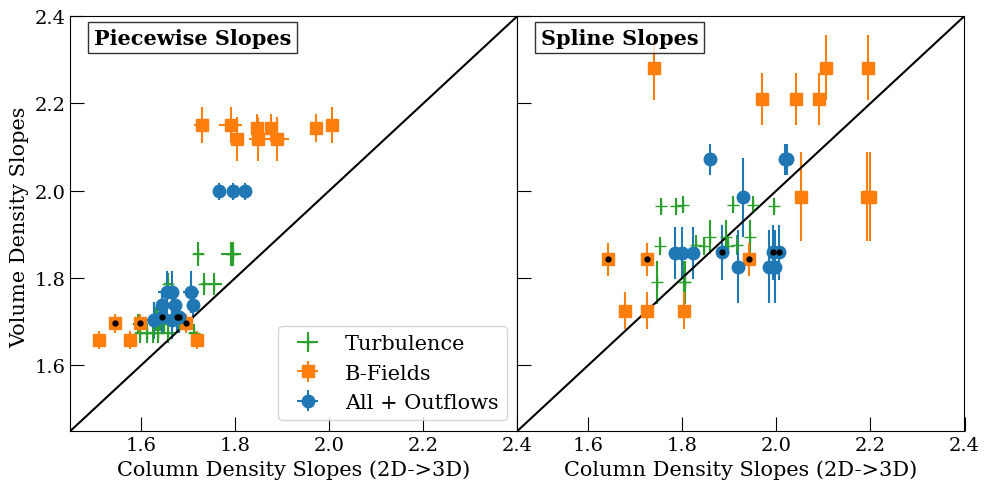

In [10]:
#load in volume densities that I made
inputfile = ('txt_file_storage/vol_spline_slope0%.txt','txt_file_storage/vol_spline_slope1%.txt','txt_file_storage/vol_spline_slope2%.txt','txt_file_storage/vol_spline_slope3%.txt','txt_file_storage/vol_spline_slope4%.txt','txt_file_storage/vol_spline_slope5%.txt')
vol_slope_spline_g = []
vol_slope_spline_gt = []
vol_slope_spline_gtm = []
vol_slope_spline_gtmp = []


#compare spline and piecewise for 1 axis
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
ax =ax.ravel()
#creates volume density of same length as column densities
grav_3D_vol_full = []
turbulence_3D_vol_spline_full = []
mag_3D_vol_spline_full = []
outflows_3D_vol_spline_full = []
grav_err_vol_spline_full = []
turbulence_err_vol_spline_full = []
mag_err_vol_spline_full = []
outflows_err_vol_spline_full = []
grav_PDF_vol_full = []
turbulence_PDF_vol_full = []
mag_PDF_vol_full = []
outflows_PDF_vol_full = []
err_volPDF_g_full = []
err_volPDF_gt_full = []
err_volPDF_gtm_full = []
err_volPDF_gtmp_full = []
for ii in range(3):
    for z in range(6):
        turbulence_3D_vol_spline_full.append(turbulence_3D_vol[z])
        mag_3D_vol_spline_full.append(mag_3D_vol[z])
        outflows_3D_vol_spline_full.append(outflows_3D_vol[z])
        turbulence_err_vol_spline_full.append(turbulence_err_vol[z])
        mag_err_vol_spline_full.append(mag_err_vol[z])
        outflows_err_vol_spline_full.append(outflows_err_vol[z])
        #do the same for the piecewise slopes
        turbulence_PDF_vol_full.append(slope_volPDF_gt[z])
        mag_PDF_vol_full.append(slope_volPDF_gtm[z])
        outflows_PDF_vol_full.append(slope_volPDF_gtmp[z])
        err_volPDF_gt_full.append(err_volPDF_gt[z])
        err_volPDF_gtm_full.append(err_volPDF_gtm[z])
        err_volPDF_gtmp_full.append(err_volPDF_gtmp[z])
#ax[0].errorbar(piece_comparison_g,grav_3D_vol_full,color = 'C3',xerr=piece_comparison_err_g, yerr = grav_err_vol_full, fmt = '*', markersize = 9, label = 'Gravity ')
ax[0].errorbar(piece_comparison_gt,turbulence_PDF_vol_full,color = 'C2',xerr=piece_comparison_err_gt,yerr = err_volPDF_gt_full, fmt = '+', markersize = 9, label = 'Turbulence')
ax[0].errorbar(piece_comparison_gtm,mag_PDF_vol_full,color = 'C1',xerr=piece_comparison_err_gtm,yerr = err_volPDF_gtm_full, fmt = 's', markersize = 9, label = 'B-Fields')
ax[0].errorbar(piece_comparison_gtmp,outflows_PDF_vol_full,color = 'C0', xerr=piece_comparison_err_gtmp,yerr = err_volPDF_gtmp_full, fmt = 'o', markersize = 9, label = 'All + Outflows')
ax[0].legend(loc = 'lower right',fontsize = 15)
#plot bells and whistles
if a == 0:
    ax[0].legend(loc = 'lower right',fontsize = 15)
#plot x = y line
ax[0].plot(x,y, color = 'black')
#plt.title('3D slopes', size = 15)
ax[0].set_xlabel('Column Density Slopes (2D->3D)', size=15)
ax[0].set_ylabel('Volume Density Slopes ', size=15)
ax[0].annotate('Piecewise Slopes', (1.5,2.35), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
#ax[0].set_xticks((1.4,1.6,1.8,2.0,2.2,2.4))
ax[0].tick_params(direction='in', which = 'major', size =10,labelsize = 14)
ax[0].tick_params(direction='in', which = 'minor', size =4)

#the Spline section
#ax[1].errorbar(spline_comparison_g,grav_3D_vol_full,color = 'C3', yerr = grav_err_vol_full, fmt = '*', markersize = 9)
ax[1].errorbar(spline_comparison_gt,turbulence_3D_vol_spline_full,color = 'C2',yerr = turbulence_err_vol_spline_full, fmt = '+', markersize = 9)
ax[1].errorbar(spline_comparison_gtm,mag_3D_vol_spline_full,color = 'C1',yerr = mag_err_vol_spline_full, fmt = 's', markersize = 9)
ax[1].errorbar(spline_comparison_gtmp,outflows_3D_vol_spline_full,color = 'C0',yerr = outflows_err_vol_spline_full, fmt = 'o', markersize = 9)

#marking trouble cases
snap = 5 #which % snapshot to mark
ax[0].errorbar(piece_comparison_gtmp[0+snap],outflows_PDF_vol_full[0+snap],color = 'black', fmt = '.', markersize = 7)
ax[0].errorbar(piece_comparison_gtmp[6+snap],outflows_PDF_vol_full[6+snap],color = 'black', fmt = '.', markersize = 7)
ax[0].errorbar(piece_comparison_gtmp[12+snap],outflows_PDF_vol_full[12+snap],color = 'black', fmt = '.', markersize = 7)
ax[1].errorbar(spline_comparison_gtmp[0+snap],outflows_3D_vol_spline_full[0+snap],color = 'black', fmt = '.', markersize = 7)
ax[1].errorbar(spline_comparison_gtmp[6+snap],outflows_3D_vol_spline_full[6+snap],color = 'black', fmt = '.', markersize = 7)
ax[1].errorbar(spline_comparison_gtmp[12+snap],outflows_3D_vol_spline_full[12+snap],color = 'black', fmt = '.', markersize = 7)

ax[0].errorbar(piece_comparison_gtm[0+snap],mag_PDF_vol_full[0+snap],color = 'black', fmt = '.', markersize = 7)
ax[0].errorbar(piece_comparison_gtm[6+snap],mag_PDF_vol_full[6+snap],color = 'black', fmt = '.', markersize = 7)
ax[0].errorbar(piece_comparison_gtm[12+snap],mag_PDF_vol_full[12+snap],color = 'black', fmt = '.', markersize = 7)
ax[1].errorbar(spline_comparison_gtm[0+snap],mag_3D_vol_spline_full[0+snap],color = 'black', fmt = '.', markersize = 7)
ax[1].errorbar(spline_comparison_gtm[6+snap],mag_3D_vol_spline_full[6+snap],color = 'black', fmt = '.', markersize = 7)
ax[1].errorbar(spline_comparison_gtm[12+snap],mag_3D_vol_spline_full[12+snap],color = 'black', fmt = '.', markersize = 7)

ax[1].plot(x,y, color = 'black')
ax[1].set_xlabel('Column Density Slopes (2D->3D)', size=15)
ax[1].set_ylim(1.45,2.4)
ax[1].set_xlim(1.45,2.4)
ax[1].annotate('Spline Slopes', (1.5,2.35), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
#ax[1].set_xticks((1.6,1.8,2.0,2.2,2.4))
ax[1].tick_params(direction='in', which = 'major', size =10,labelsize = 14)
ax[1].tick_params(direction='in', which = 'minor', size =4)

plt.tight_layout()
plt.savefig('plots/3D_slope_spline_pdFit.pdf', bbox_inches='tight', format = 'pdf')


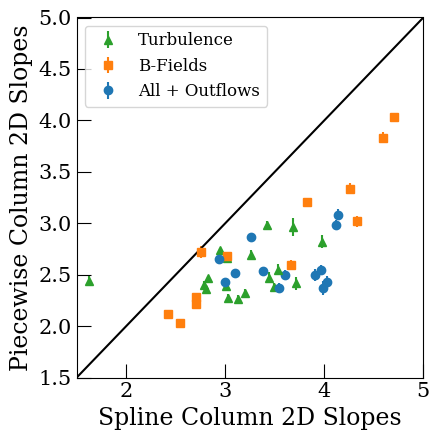

In [11]:
#2D graph of piecewise and spline slopes
#plot bells and whistles
plt.figure(figsize = (4.5,4.5))
#plot x = y line
x=.1*np.linspace(0,90)
y=x
plt.plot(x,y, color = 'black')
for a in range(3):
    plt.errorbar(spline_2D_slope_full_gt[a*6],piece_2D_slope_full_gt[a*6], yerr = piece_2D_slope_full_gt_err[a*6],color = 'C2', fmt = '^', markersize = 6, label = 'Turbulence')
    plt.errorbar(spline_2D_slope_full_gtm[a*6],piece_2D_slope_full_gtm[a*6],yerr = piece_2D_slope_full_gtm_err[a*6],color = 'C1', fmt = 's', markersize = 6, label = 'B-Fields')
    plt.errorbar(spline_2D_slope_full_gtmp[a*6],piece_2D_slope_full_gtmp[a*6],yerr = piece_2D_slope_full_gtmp_err[a*6],color = 'C0',  fmt = 'o', markersize = 6, label = 'All + Outflows')
    if a == 0:
        plt.legend(loc = 'upper left',fontsize = 12)

snap = 1
plt.errorbar(spline_2D_slope_full_gtm[0+snap][1],piece_2D_slope_full_gtm[0+snap][1],color = 'black', fmt = '.', markersize = 7)
plt.errorbar(spline_2D_slope_full_gtm[6+snap][1],piece_2D_slope_full_gtm[6+snap][1],color = 'black', fmt = '.', markersize = 7)
plt.errorbar(spline_2D_slope_full_gtm[12+snap][1],piece_2D_slope_full_gtm[12+snap][1],color = 'black', fmt = '.', markersize = 7)

#bells n whistles
plt.xlabel('Spline Column 2D Slopes', size=17)
plt.ylabel('Piecewise Column 2D Slopes', size=17)
plt.ylim(1.5,5)
plt.xlim(1.5,5)
#plt.annotate('2D Slopes', (2.0,3.5), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
plt.tick_params(direction='in', which = 'major', size =10, labelsize = 15)
plt.tick_params(direction='in', which = 'minor', size =4)
plt.tight_layout()
plt.savefig('plots/2D_spline_v_piecewise.pdf', bbox_inches='tight', format = 'pdf')

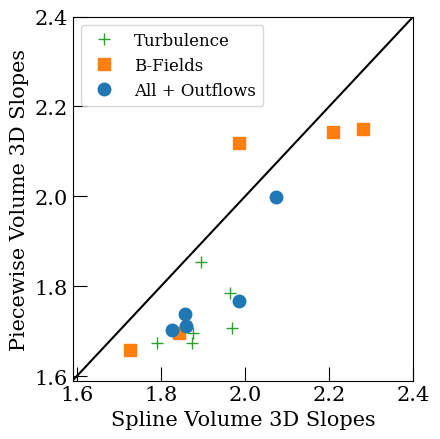

In [15]:
#2D graph of piecewise and spline slopes
#plot bells and whistles
plt.figure(figsize = (4.5,4.5))
#plot x = y line
x=.1*np.linspace(0,90)
y=x
plt.plot(x,y, color = 'black')
plt.errorbar(turbulence_3D_vol,slope_volPDF_gt,color = 'C2', fmt = '+', markersize = 9, label = 'Turbulence')
plt.errorbar(mag_3D_vol,slope_volPDF_gtm,color = 'C1', fmt = 's', markersize = 9, label = 'B-Fields')
plt.errorbar(outflows_3D_vol,slope_volPDF_gtmp,color = 'C0',  fmt = 'o', markersize = 9, label = 'All + Outflows')
plt.errorbar(mag_3D_vol[1],slope_volPDF_gtm[1],color = 'black', fmt = '.', markersize = 9)
#bells n whistles
plt.xlabel('Spline Volume 3D Slopes', size=15)
plt.ylabel('Piecewise Volume 3D Slopes', size=15)
plt.ylim(1.59,2.4)
plt.xlim(1.59,2.4)
#plt.annotate('3D Slopes', (1.2,3.75), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
plt.tick_params(direction='in', which = 'major', size =10, labelsize = 15)
plt.tick_params(direction='in', which = 'minor', size =4)
plt.legend(loc = 'upper left',fontsize = 12)
plt.tight_layout()
plt.savefig('plots/3D_spline_v_piecewise.pdf', bbox_inches='tight', format = 'pdf')
